$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 5 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [2]:
import sklearn
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [3]:
all_data = pd.read_csv('train.csv')

<ipython-input-3-6d764ae5d478>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('train.csv')


In [4]:
from sklearn.model_selection import train_test_split

train , test= train_test_split(all_data, test_size=0.3, random_state=1234, stratify= all_data["Credit_Score"] )

In [5]:
df_train = train.copy()
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8989,0x4aab,CUS_0xb85a,June,Karen Brettellu,42,991-95-5524,Accountant,56370.98,4973.581667,4,...,Good,726.6,37.370986,18 Years and 1 Months,No,180.810295,346.53886157099754,Low_spent_Small_value_payments,260.0090102633036,Poor
45957,0x12347,CUS_0xaa14,June,Costaj,-500,#F%$D@*&8,Engineer,33287.12,2844.926667,7,...,_,1137.16,25.744253,16 Years and 7 Months,No,45.785840,97.36210803690838,Low_spent_Large_value_payments,411.3447186640083,Standard
42211,0x10d55,CUS_0x2037,April,Luciaw,28,346-73-6994,Mechanic,15806.695,1300.224583,1,...,Good,1204.86,31.463281,31 Years and 4 Months,No,18.137630,66.95666921565929,Low_spent_Medium_value_payments,324.9281591890462,Good
57523,0x1670d,CUS_0x6e8b,April,Alex Frewm,47,388-81-5443,_______,121197.9,NaN,2,...,Good,203.65,42.179995,20 Years and 10 Months,NM,370.619302,137.82135258500307,High_spent_Large_value_payments,760.1418457820148,Good
44032,0x11802,CUS_0x25ad,January,Annar,36,543-36-7249,Teacher,19744.64,1451.386667,3,...,Standard,1262.89,29.254643,17 Years and 9 Months,NM,28.521276,79.86459139669432,High_spent_Small_value_payments,296.75279936252593,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84184,0x20346,CUS_0x58a3,January,Sam Cagek,29,806-40-7521,Developer,21526.91,1540.909167,6,...,_,261.14,27.879077,16 Years and 8 Months,Yes,20.923227,111.83629931564636,Low_spent_Medium_value_payments,301.3313904573993,Standard
29419,0xc261,CUS_0xbbc6,April,ra Alpere,3244,122-43-5969,Accountant,38624.06,3043.671667,0,...,_,1394.46,30.278075,15 Years and 8 Months,No,78.452026,187.80251564224326,!@9#%8,298.1126254117825,Good
90750,0x229bc,CUS_0xb2fc,July,Jessica Wohlt,28,452-02-4154,Doctor,79649.31,6358.442500,7,...,_,821.35,29.735341,27 Years and 9 Months,No,12426.000000,93.74248209219844,High_spent_Medium_value_payments,665.8376247953622,Good
6862,0x3e34,CUS_0x11eb,July,Millikenw,24,032-85-4630,Entrepreneur,62835.08,5464.256667,0,...,Good,306.85,29.108156,33 Years and 2 Months,No,67.384074,128.28230575148794,High_spent_Large_value_payments,590.7592868009949,Good


In [6]:
X= df_train.drop("Credit_Score", axis=1)
Y= df_train["Credit_Score"]

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [7]:
df_train. columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 8989 to 53687
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        70000 non-null  object 
 1   Customer_ID               70000 non-null  object 
 2   Month                     70000 non-null  object 
 3   Name                      62914 non-null  object 
 4   Age                       70000 non-null  object 
 5   SSN                       70000 non-null  object 
 6   Occupation                70000 non-null  object 
 7   Annual_Income             70000 non-null  object 
 8   Monthly_Inhand_Salary     59528 non-null  float64
 9   Num_Bank_Accounts         70000 non-null  int64  
 10  Num_Credit_Card           70000 non-null  int64  
 11  Interest_Rate             70000 non-null  int64  
 12  Num_of_Loan               70000 non-null  object 
 13  Type_of_Loan              61998 non-null  object 
 14  Del

In [9]:
df_train. describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,59528.000000,70000.000000,70000.000000,70000.000000,70000.000000,68633.000000,70000.000000,70000.000000
mean,4201.308323,17.369300,22.825600,72.431071,21.063329,28.163129,32.282023,1366.850856
std,3189.941895,119.119233,130.938771,465.664614,14.860214,195.420149,5.129427,8167.372141
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1623.583854,3.000000,4.000000,8.000000,10.000000,3.000000,28.035329,30.133133
50%,3096.378333,6.000000,5.000000,13.000000,18.000000,6.000000,32.298933,68.821705
75%,5980.468333,7.000000,7.000000,20.000000,28.000000,9.000000,36.505074,159.990097
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [10]:
df_train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         7086
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       10472
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 8002
Delay_from_due_date             0
Num_of_Delayed_Payment       4957
Changed_Credit_Limit            0
Num_Credit_Inquiries         1367
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6293
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3135
Payment_Behaviour               0
Monthly_Balance               839
Credit_Score                    0
dtype: int64

In [11]:
df_train.duplicated().sum()

0

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

In [12]:
np.unique(df_train['Age'])

array(['-500', '1004', '1006', ..., '99', '992', '993'], dtype=object)

In [13]:
df_train ['Type_of_Loan'].values

array(['Auto Loan, Debt Consolidation Loan, Personal Loan, and Debt Consolidation Loan',
       'Mortgage Loan, and Personal Loan', 'Auto Loan, and Student Loan',
       ..., 'Payday Loan, Debt Consolidation Loan, and Mortgage Loan',
       'Home Equity Loan, and Debt Consolidation Loan',
       'Student Loan, Debt Consolidation Loan, and Personal Loan'],
      dtype=object)

In [14]:
Months= np.unique(df_train['Month'])
Months

array(['April', 'August', 'February', 'January', 'July', 'June', 'March',
       'May'], dtype=object)

<Axes: xlabel='Credit_Mix', ylabel='count'>

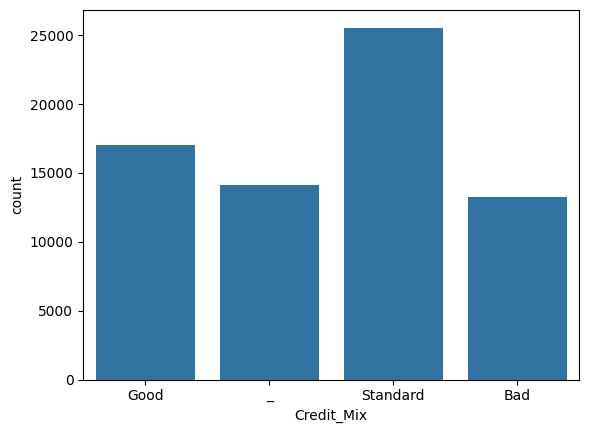

In [15]:
sns.countplot(df_train, x='Credit_Mix')



<ipython-input-16-f289f6110878>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_train,x='Month',palette="mako");


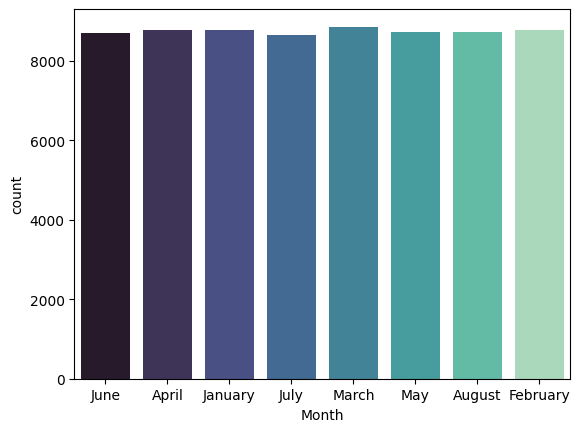

In [16]:
sns.countplot(df_train,x='Month',palette="mako");


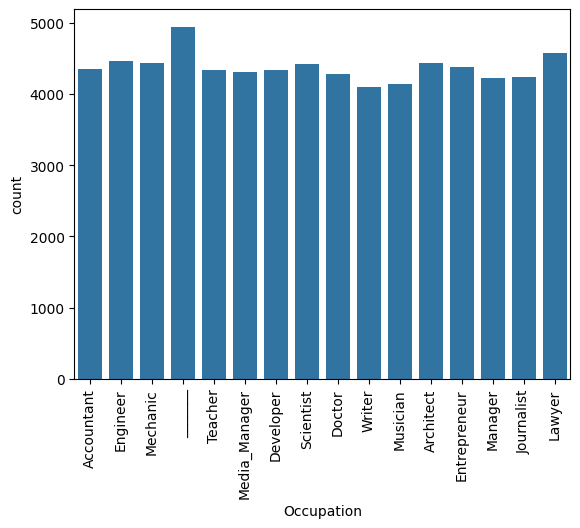

In [17]:
sns.countplot(df_train, x='Occupation');
plt.xticks(rotation=90);

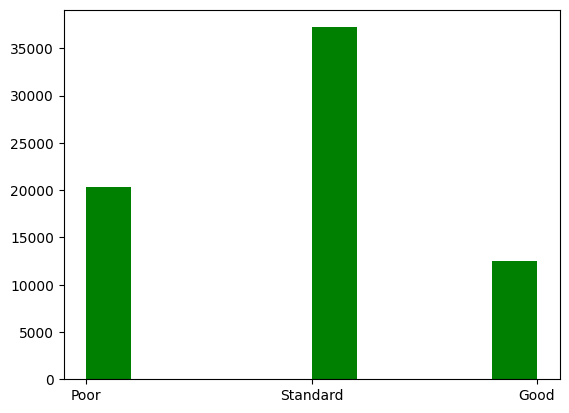

In [18]:
plt.hist(df_train['Credit_Score'], color='g');

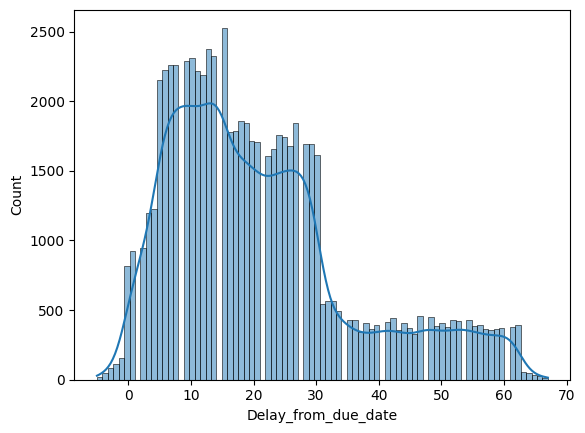

In [19]:
sns.histplot(df_train ['Delay_from_due_date'], kde=True);


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

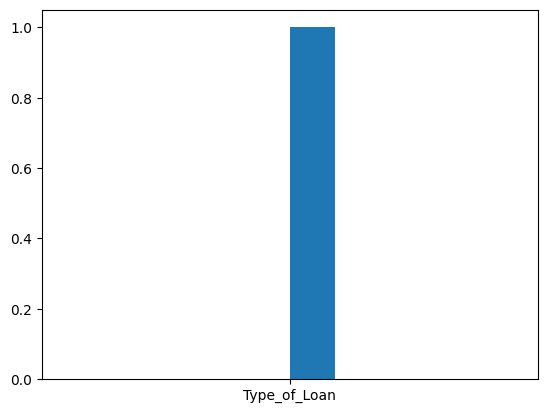

In [20]:
plt.hist('Type_of_Loan')

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

In [21]:
columns_to_delete=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio', 'Amount_invested_monthly']
df_train = df_train.drop(columns_to_delete , axis=1)


In [22]:
df_train= df_train.dropna()
df_train

,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
8989,42,Accountant,56370.98,3,-100,18,2,726.6,18 Years and 1 Months,No,180.810295,Low_spent_Small_value_payments,260.0090102633036,Poor
45957,-500,Engineer,33287.12,9,2,23,12,1137.16,16 Years and 7 Months,No,45.785840,Low_spent_Large_value_payments,411.3447186640083,Standard
42211,28,Mechanic,15806.695,6,2,12,10,1204.86,31 Years and 4 Months,No,18.137630,Low_spent_Medium_value_payments,324.9281591890462,Good
57523,47,_______,121197.9,11,4,4,12,203.65,20 Years and 10 Months,NM,370.619302,High_spent_Large_value_payments,760.1418457820148,Good
44032,36,Teacher,19744.64,34,3,17,13,1262.89,17 Years and 9 Months,NM,28.521276,High_spent_Small_value_payments,296.75279936252593,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27719,27_,Doctor,8493710.0,7,1,6,16,90.37,25 Years and 6 Months,Yes,28.447686,Low_spent_Medium_value_payments,434.88344189208397,Standard
59606,45,_______,60226.16,5,0,12,14,873.05,20 Years and 8 Months,No,0.000000,Low_spent_Small_value_payments,434.16242608717596,Standard
29419,3244,Accountant,38624.06,11,4,6,10,1394.46,15 Years and 8 Months,No,78.452026,!@9#%8,298.1126254117825,Good
90750,28,Doctor,79649.31,9,3,14,12,821.35,27 Years and 9 Months,No,12426.000000,High_spent_Medium_value_payments,665.8376247953622,Good


In [23]:
df_train.dtypes

Age                        object
Occupation                 object
Annual_Income              object
Interest_Rate               int64
Num_of_Loan                object
Delay_from_due_date         int64
Num_of_Delayed_Payment     object
Outstanding_Debt           object
Credit_History_Age         object
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour          object
Monthly_Balance            object
Credit_Score               object
dtype: object

In [24]:
df_train['Age'] = df_train['Age'].apply(pd.to_numeric, errors='coerce')

#df_train['Age'].astype(int)

In [25]:
df_train['Age']

8989       42.0
45957    -500.0
42211      28.0
57523      47.0
44032      36.0
          ...  
27719       NaN
59606      45.0
29419    3244.0
90750      28.0
53687      39.0
Name: Age, Length: 58528, dtype: float64

In [26]:
df_train=df_train[df_train['Age'] > 0]

In [27]:
df_train

,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
8989,42.0,Accountant,56370.98,3,-100,18,2,726.6,18 Years and 1 Months,No,180.810295,Low_spent_Small_value_payments,260.0090102633036,Poor
42211,28.0,Mechanic,15806.695,6,2,12,10,1204.86,31 Years and 4 Months,No,18.137630,Low_spent_Medium_value_payments,324.9281591890462,Good
57523,47.0,_______,121197.9,11,4,4,12,203.65,20 Years and 10 Months,NM,370.619302,High_spent_Large_value_payments,760.1418457820148,Good
44032,36.0,Teacher,19744.64,34,3,17,13,1262.89,17 Years and 9 Months,NM,28.521276,High_spent_Small_value_payments,296.75279936252593,Poor
59,30.0,_______,34081.38,15,3,34,14,1704.18,14 Years and 10 Months,Yes,70.478333,Low_spent_Small_value_payments,260.0809753987602,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98771,36.0,Developer,101316.64,9,3_,16,18,559.18,18 Years and 4 Months,No,166.272881,High_spent_Small_value_payments,411.553626,Standard
59606,45.0,_______,60226.16,5,0,12,14,873.05,20 Years and 8 Months,No,0.000000,Low_spent_Small_value_payments,434.16242608717596,Standard
29419,3244.0,Accountant,38624.06,11,4,6,10,1394.46,15 Years and 8 Months,No,78.452026,!@9#%8,298.1126254117825,Good
90750,28.0,Doctor,79649.31,9,3,14,12,821.35,27 Years and 9 Months,No,12426.000000,High_spent_Medium_value_payments,665.8376247953622,Good


In [28]:
df_train=df_train[df_train['Age'] < 80]

In [29]:
df_train

,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
8989,42.0,Accountant,56370.98,3,-100,18,2,726.6,18 Years and 1 Months,No,180.810295,Low_spent_Small_value_payments,260.0090102633036,Poor
42211,28.0,Mechanic,15806.695,6,2,12,10,1204.86,31 Years and 4 Months,No,18.137630,Low_spent_Medium_value_payments,324.9281591890462,Good
57523,47.0,_______,121197.9,11,4,4,12,203.65,20 Years and 10 Months,NM,370.619302,High_spent_Large_value_payments,760.1418457820148,Good
44032,36.0,Teacher,19744.64,34,3,17,13,1262.89,17 Years and 9 Months,NM,28.521276,High_spent_Small_value_payments,296.75279936252593,Poor
59,30.0,_______,34081.38,15,3,34,14,1704.18,14 Years and 10 Months,Yes,70.478333,Low_spent_Small_value_payments,260.0809753987602,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47517,23.0,Musician,31795.08,23,7,33,16,2053.98,8 Years and 3 Months,Yes,360.768878,Low_spent_Medium_value_payments,195.13967396897343,Poor
98771,36.0,Developer,101316.64,9,3_,16,18,559.18,18 Years and 4 Months,No,166.272881,High_spent_Small_value_payments,411.553626,Standard
59606,45.0,_______,60226.16,5,0,12,14,873.05,20 Years and 8 Months,No,0.000000,Low_spent_Small_value_payments,434.16242608717596,Standard
90750,28.0,Doctor,79649.31,9,3,14,12,821.35,27 Years and 9 Months,No,12426.000000,High_spent_Medium_value_payments,665.8376247953622,Good


In [30]:
np.unique(df_train['Age'])

array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56.])

In [31]:
#correcting wrong data with symbols
df_train = df_train.dropna()
df_train = df_train[df_train['Occupation'].str.contains('_______') == False]
df_train = df_train[df_train['Payment_Behaviour'].str.contains('!@9#%8') == False]

sym = "\\`*_{}[]()>#@+!$:;"

col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_of_Loan']

col_str_train = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']

for i in col_int:
    for symbol in sym:
        df_train[i] = df_train[i].astype(str).str.replace(symbol,'')
for i in col_str_train:
    for symbol in sym:
        df_train[i] = df_train[i].replace(symbol,'')
df_train

<ipython-input-31-07d3a826c036>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_train[i] = df_train[i].astype(str).str.replace(symbol,'')


,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
8989,42.0,Accountant,56370.98,3,-100,18,2,726.6,18 Years and 1 Months,No,180.81029483236568,Low_spent_Small_value_payments,260.0090102633036,Poor
42211,28.0,Mechanic,15806.695,6,2,12,10,1204.86,31 Years and 4 Months,No,18.13762992862785,Low_spent_Medium_value_payments,324.9281591890462,Good
44032,36.0,Teacher,19744.64,34,3,17,13,1262.89,17 Years and 9 Months,NM,28.521275907446427,High_spent_Small_value_payments,296.75279936252593,Poor
58171,38.0,Accountant,61648.24,15,8,33,18,4129.59,3 Years and 4 Months,Yes,358.9967146153901,High_spent_Small_value_payments,181.7575648659464,Standard
99925,38.0,Media_Manager,139664.96,12,4,14,12,365.66,30 Years and 0 Months,Yes,423.7310158122875,Low_spent_Large_value_payments,182.54753885482623,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40749,37.0,Mechanic,70709.04,20,6,9,15,805.64,16 Years and 10 Months,Yes,260.88351244918806,Low_spent_Medium_value_payments,320.670328682356,Standard
47517,23.0,Musician,31795.08,23,7,33,16,2053.98,8 Years and 3 Months,Yes,360.7688775599901,Low_spent_Medium_value_payments,195.13967396897343,Poor
98771,36.0,Developer,101316.64,9,3,16,18,559.18,18 Years and 4 Months,No,166.27288143071362,High_spent_Small_value_payments,411.55362578009886,Standard
90750,28.0,Doctor,79649.31,9,3,14,12,821.35,27 Years and 9 Months,No,12426.0,High_spent_Medium_value_payments,665.8376247953622,Good


In [32]:
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df_train['Credit_History_Age'] = df_train['Credit_History_Age'].astype(str).str.replace('Months','')

In [33]:
df_train[['Credit_History_Age']]

,Credit_History_Age
8989,18.1
42211,31.4
44032,17.9
58171,3.4
99925,30.0
...,...
40749,16.10
47517,8.3
98771,18.4
90750,27.9


In [34]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_of_Loan', 'Credit_History_Age']

for i in col_int2:
    df_train[i] = df_train[i].astype(float)
df_train.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Interest_Rate               int64
Num_of_Loan               float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [35]:
np.unique(df_train['Payment_Behaviour'])

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [36]:
#Ordinal_Encoding for Payment_Behaviour
from sklearn.preprocessing import OrdinalEncoder

Payment_Behaviour= df_train[['Payment_Behaviour']]

encoder = OrdinalEncoder(categories=[['Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments'
                                      ,'High_spent_Small_value_payments', 'High_spent_Medium_value_payments','High_spent_Large_value_payments']])
Payment_Behaviour_encoded = encoder.fit_transform(Payment_Behaviour)
Payment_Behaviour_encoded

array([[0.],
       [1.],
       [3.],
       ...,
       [3.],
       [4.],
       [5.]])

In [37]:
np.unique(df_train['Credit_Score'])

array(['Good', 'Poor', 'Standard'], dtype=object)

In [38]:
#Ordinal_Encoding for credit_score
from sklearn.preprocessing import OrdinalEncoder

credit_score = df_train[['Credit_Score']]

encoder_credit_score = OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']])
credit_score_encoded = encoder_credit_score.fit_transform (credit_score)
credit_score_encoded

array([[0.],
       [2.],
       [0.],
       ...,
       [1.],
       [2.],
       [1.]])

In [39]:
# 1Hot_Encoding for Occupation

from sklearn.preprocessing import OneHotEncoder

occupation = df_train[['Occupation']]
occupation_encoder = OneHotEncoder()
encoded_occupation = occupation_encoder.fit_transform(occupation)
encoded_occupation

<46510x15 sparse matrix of type '<class 'numpy.float64'>'
	with 46510 stored elements in Compressed Sparse Row format>

In [40]:
encoded_occupation_array= encoded_occupation.toarray()

In [41]:
np.unique(df_train[['Payment_of_Min_Amount']])

array(['NM', 'No', 'Yes'], dtype=object)

In [42]:
# 1Hot_Encoding for Payment_of_Min_Amount

from sklearn.preprocessing import OneHotEncoder

payment_of_Min_Amount = df_train[['Payment_of_Min_Amount']]
min_amount_encoder = OneHotEncoder()
encoded_payment_of_Min_Amount = min_amount_encoder.fit_transform(payment_of_Min_Amount)
encoded_payment_of_Min_Amount

<46510x3 sparse matrix of type '<class 'numpy.float64'>'
	with 46510 stored elements in Compressed Sparse Row format>

In [43]:
encoded_payment_of_Min_Amount_array= encoded_payment_of_Min_Amount.toarray()

In [44]:
encoded_payment_of_Min_Amount_array

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [45]:
categorical_list1= ['Occupation','Payment_of_Min_Amount','Payment_Behaviour', 'Credit_Score']
dropped_categorical= df_train.drop(categorical_list1, axis=1)
dropped_categorical

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance
8989,42.0,56370.980,3,-100.0,18.0,2.0,726.60,18.1,180.810295,260.009010
42211,28.0,15806.695,6,2.0,12.0,10.0,1204.86,31.4,18.137630,324.928159
44032,36.0,19744.640,34,3.0,17.0,13.0,1262.89,17.9,28.521276,296.752799
58171,38.0,61648.240,15,8.0,33.0,18.0,4129.59,3.4,358.996715,181.757565
99925,38.0,139664.960,12,4.0,14.0,12.0,365.66,30.0,423.731016,182.547539
...,...,...,...,...,...,...,...,...,...,...
40749,37.0,70709.040,20,6.0,9.0,15.0,805.64,16.1,260.883512,320.670329
47517,23.0,31795.080,23,7.0,33.0,16.0,2053.98,8.3,360.768878,195.139674
98771,36.0,101316.640,9,3.0,16.0,18.0,559.18,18.4,166.272881,411.553626
90750,28.0,79649.310,9,3.0,14.0,12.0,821.35,27.9,12426.000000,665.837625


In [46]:
#the next steps to transform encoded categorical from array to df to be able to concat them

In [47]:
#1- credit score to df
credit_score_encoded_d=pd.DataFrame(credit_score_encoded, index=dropped_categorical.index)

In [48]:
#2- occupation to df
encoded_occupation_df= pd.DataFrame(encoded_occupation_array, index=dropped_categorical.index )
encoded_occupation_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
8989,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58171,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
47517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90750,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#3- payment_of_Min_Amount to df
encoded_payment_of_Min_Amount_df= pd.DataFrame(encoded_payment_of_Min_Amount_array,index=dropped_categorical.index)
encoded_payment_of_Min_Amount_df

,0,1,2
8989,0.0,1.0,0.0
42211,0.0,1.0,0.0
44032,1.0,0.0,0.0
58171,0.0,0.0,1.0
99925,0.0,0.0,1.0
...,...,...,...
40749,0.0,0.0,1.0
47517,0.0,0.0,1.0
98771,0.0,1.0,0.0
90750,0.0,1.0,0.0


In [50]:
#4- Payment_Behaviour to df
Payment_Behaviour_df= pd.DataFrame(Payment_Behaviour_encoded,index=dropped_categorical.index)
Payment_Behaviour_df

,0
8989,0.0
42211,1.0
44032,3.0
58171,3.0
99925,2.0
...,...
40749,1.0
47517,1.0
98771,3.0
90750,4.0


In [51]:
Prepared_train_df= pd.concat([dropped_categorical, encoded_occupation_df, encoded_payment_of_Min_Amount_df,Payment_Behaviour_df, credit_score_encoded_d], axis=1)

In [52]:
Prepared_train_df

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,...,10,11,12,13,14,0,1,2,0,0
8989,42.0,56370.980,3,-100.0,18.0,2.0,726.60,18.1,180.810295,260.009010,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42211,28.0,15806.695,6,2.0,12.0,10.0,1204.86,31.4,18.137630,324.928159,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
44032,36.0,19744.640,34,3.0,17.0,13.0,1262.89,17.9,28.521276,296.752799,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0
58171,38.0,61648.240,15,8.0,33.0,18.0,4129.59,3.4,358.996715,181.757565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
99925,38.0,139664.960,12,4.0,14.0,12.0,365.66,30.0,423.731016,182.547539,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40749,37.0,70709.040,20,6.0,9.0,15.0,805.64,16.1,260.883512,320.670329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
47517,23.0,31795.080,23,7.0,33.0,16.0,2053.98,8.3,360.768878,195.139674,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
98771,36.0,101316.640,9,3.0,16.0,18.0,559.18,18.4,166.272881,411.553626,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0
90750,28.0,79649.310,9,3.0,14.0,12.0,821.35,27.9,12426.000000,665.837625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0


In [53]:
# Definition of x_train and y_train that will bes used with our model
x_train= pd.concat([dropped_categorical, encoded_occupation_df, encoded_payment_of_Min_Amount_df,Payment_Behaviour_df], axis=1)
y_train= credit_score_encoded_d

In [54]:
#Another Solution with numpy "just for info"
Prepared_Train_data= np.concatenate((dropped_categorical,credit_score_encoded_d, encoded_occupation_array,encoded_payment_of_Min_Amount_array),axis=1)
Prepared_Train_data.shape
df_train_new= pd.DataFrame(Prepared_Train_data)


In [55]:
#Saving trained data in CSV file
Prepared_train_df.to_csv('prepared_train_data.csv', index=False)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [56]:
df_test = test.copy()
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
75039,0x1cdad,CUS_0x8bc6,August,Deepa Seetharamann,18,788-76-2462,Lawyer,18888.46,1368.038333,8,...,Bad,1543.58,29.310960,14 Years and 10 Months,Yes,69.043340,95.18179777777365,Low_spent_Medium_value_payments,252.57869604439992,Poor
98563,0x25785,CUS_0x5b6c,April,ernardx,34,796-18-5446,Scientist,68183.84,5916.986667,8,...,Bad,3341.21,33.416676,11 Years and 5 Months,Yes,201.161510,246.66368747678916,High_spent_Small_value_payments,403.873469,Poor
62461,0x183fb,CUS_0xb46b,June,Marwa Awadb,34,686-19-5711,Entrepreneur,17831.05,1382.920833,6,...,Standard,1691.54,31.756928,7 Years and 0 Months,Yes,42.793004,78.96196417194348,!@9#%8,306.53711556220935,Poor
60025,0x175b7,CUS_0x8c88,February,Krudyc,15,034-83-1351,Accountant,57889.44,4592.120000,10,...,Bad,1253.64,34.066273,15 Years and 4 Months,Yes,228.528522,574.570509705208,Low_spent_Small_value_payments,NaN,Standard
96837,0x24d67,CUS_0x38b6,June,Tiziana Barghiniu,23,698-45-9293,Musician,39447.48,3393.290000,5,...,Standard,1924.32,28.369948,14 Years and 9 Months,Yes,194.422237,391.66949170658216,Low_spent_Small_value_payments,43.23727086689291,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47336,0x12b5e,CUS_0x330a,January,Hirschlerw,41,936-92-2913,_______,43892.31,3798.692500,6,...,_,2001.71,37.331864,10 Years and 2 Months,Yes,80.111424,72.15687803923424,High_spent_Medium_value_payments,477.6009482537025,Poor
74375,0x1c9c9,CUS_0x7029,August,NaN,21,212-62-9956,Entrepreneur,16944.54,1689.045000,8,...,Standard,1066.99,38.908656,32 Years and 4 Months,Yes,0.000000,89.76288957840704,Low_spent_Large_value_payments,349.14161042159304,Good
95984,0x2486a,CUS_0x194b,January,Liza Dobkinan,29,661-41-7229,Engineer,161272.04,13312.336667,1,...,Good,705.53,30.601809,NaN,No,288.013678,295.89959687681016,High_spent_Small_value_payments,1007.3203915931133,Poor
82686,0x1fa7c,CUS_0x86ab,July,Lim,55,498-78-4795,Mechanic,107677.98,8856.165000,3,...,_,877.65,23.918402,25 Years and 8 Months,No,99.790794,933.966429221843,Low_spent_Small_value_payments,141.85927656337367,Standard


In [57]:
columns_to_delete=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio', 'Amount_invested_monthly']
df_test = df_test.drop(columns_to_delete , axis=1)

In [58]:
df_test= df_test.dropna()
df_test

,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
75039,18,Lawyer,18888.46,18,7,50,19,1543.58,14 Years and 10 Months,Yes,69.043340,Low_spent_Medium_value_payments,252.57869604439992,Poor
98563,34,Scientist,68183.84,27,7,31,22,3341.21,11 Years and 5 Months,Yes,201.161510,High_spent_Small_value_payments,403.873469,Poor
62461,34,Entrepreneur,17831.05,16,3,18,18,1691.54,7 Years and 0 Months,Yes,42.793004,!@9#%8,306.53711556220935,Poor
96837,23,Musician,39447.48,31,6,25,12_,1924.32,14 Years and 9 Months,Yes,194.422237,Low_spent_Small_value_payments,43.23727086689291,Poor
82320,35_,Accountant,64930.47,20,2,15,19,1239.09,21 Years and 8 Months,Yes,91.129712,High_spent_Medium_value_payments,470.2305429515587,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86176,19,Scientist,52797.3,33,5,60,17,2563.97,6 Years and 4 Months,NM,209.932888,Low_spent_Medium_value_payments,121.00545484847784,Poor
47336,41,_______,43892.31,28,4,45,22,2001.71,10 Years and 2 Months,Yes,80.111424,High_spent_Medium_value_payments,477.6009482537025,Poor
74375,21,Entrepreneur,16944.54,16,0,17,20,1066.99,32 Years and 4 Months,Yes,0.000000,Low_spent_Large_value_payments,349.14161042159304,Good
82686,55,Mechanic,107677.98,12,2,11,9,877.65,25 Years and 8 Months,No,99.790794,Low_spent_Small_value_payments,141.85927656337367,Standard


In [59]:
df_test['Age'] = df_test['Age'].apply(pd.to_numeric, errors='coerce')

In [60]:
df_test=df_test[df_test['Age'] > 0]
df_test

,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
75039,18.0,Lawyer,18888.46,18,7,50,19,1543.58,14 Years and 10 Months,Yes,69.043340,Low_spent_Medium_value_payments,252.57869604439992,Poor
98563,34.0,Scientist,68183.84,27,7,31,22,3341.21,11 Years and 5 Months,Yes,201.161510,High_spent_Small_value_payments,403.873469,Poor
62461,34.0,Entrepreneur,17831.05,16,3,18,18,1691.54,7 Years and 0 Months,Yes,42.793004,!@9#%8,306.53711556220935,Poor
96837,23.0,Musician,39447.48,31,6,25,12_,1924.32,14 Years and 9 Months,Yes,194.422237,Low_spent_Small_value_payments,43.23727086689291,Poor
24610,35.0,Media_Manager,36857.22,14,2,19,12,1911.65,10 Years and 10 Months,Yes,56.042521,Low_spent_Small_value_payments,170.96699610275715,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86176,19.0,Scientist,52797.3,33,5,60,17,2563.97,6 Years and 4 Months,NM,209.932888,Low_spent_Medium_value_payments,121.00545484847784,Poor
47336,41.0,_______,43892.31,28,4,45,22,2001.71,10 Years and 2 Months,Yes,80.111424,High_spent_Medium_value_payments,477.6009482537025,Poor
74375,21.0,Entrepreneur,16944.54,16,0,17,20,1066.99,32 Years and 4 Months,Yes,0.000000,Low_spent_Large_value_payments,349.14161042159304,Good
82686,55.0,Mechanic,107677.98,12,2,11,9,877.65,25 Years and 8 Months,No,99.790794,Low_spent_Small_value_payments,141.85927656337367,Standard


In [61]:
df_test=df_test[df_test['Age'] < 80]

In [62]:
#correcting wrong data with symbols
df_test = df_test.dropna()
df_test = df_test[df_test['Occupation'].str.contains('_______') == False]
df_test = df_test[df_test['Payment_Behaviour'].str.contains('!@9#%8') == False]

sym = "\\`*_{}[]()>#@+!$:;"

col_int_ = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_of_Loan']

col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour']

for i in col_int_:
    for symbol in sym:
        df_test[i] = df_test[i].astype(str).str.replace(symbol,'')
for i in col_str:
    for symbol in sym:
        df_test[i] = df_test[i].replace(symbol,'')
df_test


<ipython-input-62-c3a7f0b630a8>:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test[i] = df_test[i].astype(str).str.replace(symbol,'')


,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
75039,18.0,Lawyer,18888.46,18,7,50,19,1543.58,14 Years and 10 Months,Yes,69.04333951115974,Low_spent_Medium_value_payments,252.57869604439992,Poor
98563,34.0,Scientist,68183.84,27,7,31,22,3341.21,11 Years and 5 Months,Yes,201.1615103014232,High_spent_Small_value_payments,403.8734688884542,Poor
96837,23.0,Musician,39447.48,31,6,25,12,1924.32,14 Years and 9 Months,Yes,194.42223742652493,Low_spent_Small_value_payments,43.23727086689291,Poor
24610,35.0,Media_Manager,36857.22,14,2,19,12,1911.65,10 Years and 10 Months,Yes,56.042520607086665,Low_spent_Small_value_payments,170.96699610275715,Standard
51577,28.0,Musician,33787.3,34,6,44,15,2813.15,7 Years and 10 Months,Yes,101.55315770605269,Low_spent_Small_value_payments,375.5479531162051,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,27.0,Accountant,10494.44,7,6,14,11,2579.62,15 Years and 4 Months,NM,46.16021051909581,Low_spent_Small_value_payments,294.9095960661,Standard
86176,19.0,Scientist,52797.3,33,5,60,17,2563.97,6 Years and 4 Months,NM,209.9328876282393,Low_spent_Medium_value_payments,121.00545484847784,Poor
74375,21.0,Entrepreneur,16944.54,16,0,17,20,1066.99,32 Years and 4 Months,Yes,0.0,Low_spent_Large_value_payments,349.14161042159304,Good
82686,55.0,Mechanic,107677.98,12,2,11,9,877.65,25 Years and 8 Months,No,99.7907942147834,Low_spent_Small_value_payments,141.85927656337367,Standard


In [63]:
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df_test['Credit_History_Age'] = df_test['Credit_History_Age'].astype(str).str.replace('Months','')


In [64]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_of_Loan', 'Credit_History_Age']

for i in col_int2:
    df_test[i] = df_test[i].astype(float)
df_test.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Interest_Rate               int64
Num_of_Loan               float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour          object
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [65]:
df_test

,Age,Occupation,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
75039,18.0,Lawyer,18888.46,18,7.0,50.0,19.0,1543.58,14.1,Yes,69.043340,Low_spent_Medium_value_payments,252.578696,Poor
98563,34.0,Scientist,68183.84,27,7.0,31.0,22.0,3341.21,11.5,Yes,201.161510,High_spent_Small_value_payments,403.873469,Poor
96837,23.0,Musician,39447.48,31,6.0,25.0,12.0,1924.32,14.9,Yes,194.422237,Low_spent_Small_value_payments,43.237271,Poor
24610,35.0,Media_Manager,36857.22,14,2.0,19.0,12.0,1911.65,10.1,Yes,56.042521,Low_spent_Small_value_payments,170.966996,Standard
51577,28.0,Musician,33787.30,34,6.0,44.0,15.0,2813.15,7.1,Yes,101.553158,Low_spent_Small_value_payments,375.547953,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,27.0,Accountant,10494.44,7,6.0,14.0,11.0,2579.62,15.4,NM,46.160211,Low_spent_Small_value_payments,294.909596,Standard
86176,19.0,Scientist,52797.30,33,5.0,60.0,17.0,2563.97,6.4,NM,209.932888,Low_spent_Medium_value_payments,121.005455,Poor
74375,21.0,Entrepreneur,16944.54,16,0.0,17.0,20.0,1066.99,32.4,Yes,0.000000,Low_spent_Large_value_payments,349.141610,Good
82686,55.0,Mechanic,107677.98,12,2.0,11.0,9.0,877.65,25.8,No,99.790794,Low_spent_Small_value_payments,141.859277,Standard


In [66]:
np.unique(df_test[['Payment_Behaviour']])

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [67]:
#Ordinal_Encoding for Payment_Behaviour
Payment_Behaviour_test= df_test[['Payment_Behaviour']]
Payment_Behaviour_test_encoded = encoder.transform(Payment_Behaviour_test)
Payment_Behaviour_test_encoded

array([[1.],
       [3.],
       [0.],
       ...,
       [2.],
       [0.],
       [5.]])

In [68]:
# 1Hot_Encoding for Occupation
occupation_test= df_test[['Occupation']]
encoded_occupation_test = occupation_encoder.transform(occupation_test)
encoded_occupation_test

<19830x15 sparse matrix of type '<class 'numpy.float64'>'
	with 19830 stored elements in Compressed Sparse Row format>

In [69]:
encoded_occupation_array_test= encoded_occupation_test.toarray()
encoded_occupation_array_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
# 1Hot_Encoding for Payment_of_Min_Amount

payment_of_Min_Amount_test = df_test[['Payment_of_Min_Amount']]
encoded_payment_of_Min_Amount_test = min_amount_encoder.transform(payment_of_Min_Amount_test)
encoded_payment_of_Min_Amount_array_test= encoded_payment_of_Min_Amount_test.toarray()

In [71]:
#Ordinal_Encoding for credit_score

credit_score_test = df_test[['Credit_Score']]

credit_score_encoded_test = encoder_credit_score.transform (credit_score_test)
credit_score_encoded_test

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [1.],
       [2.]])

In [72]:
categorical_list1= ['Occupation','Payment_of_Min_Amount','Payment_Behaviour', 'Credit_Score']
dropped_categorical_test= df_test.drop(categorical_list1, axis=1)
dropped_categorical_test


,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance
75039,18.0,18888.46,18,7.0,50.0,19.0,1543.58,14.1,69.043340,252.578696
98563,34.0,68183.84,27,7.0,31.0,22.0,3341.21,11.5,201.161510,403.873469
96837,23.0,39447.48,31,6.0,25.0,12.0,1924.32,14.9,194.422237,43.237271
24610,35.0,36857.22,14,2.0,19.0,12.0,1911.65,10.1,56.042521,170.966996
51577,28.0,33787.30,34,6.0,44.0,15.0,2813.15,7.1,101.553158,375.547953
...,...,...,...,...,...,...,...,...,...,...
61525,27.0,10494.44,7,6.0,14.0,11.0,2579.62,15.4,46.160211,294.909596
86176,19.0,52797.30,33,5.0,60.0,17.0,2563.97,6.4,209.932888,121.005455
74375,21.0,16944.54,16,0.0,17.0,20.0,1066.99,32.4,0.000000,349.141610
82686,55.0,107677.98,12,2.0,11.0,9.0,877.65,25.8,99.790794,141.859277


In [73]:
#transform encoded categorical from array to df to concat them

In [74]:
#1- credit score to df
credit_score_encoded_test_df=pd.DataFrame(credit_score_encoded_test, index=dropped_categorical_test.index)

#2- occupation to df
encoded_occupation_test_df= pd.DataFrame(encoded_occupation_array_test, index=dropped_categorical_test.index )


#3- payment_of_Min_Amount to df
encoded_payment_of_Min_Amount_test_df= pd.DataFrame(encoded_payment_of_Min_Amount_array_test,index=dropped_categorical_test.index)

#4- Payment_Behaviour to df
Payment_Behaviour_test_df= pd.DataFrame(Payment_Behaviour_test_encoded,index=dropped_categorical_test.index)


In [75]:
Prepared_test_df=pd.concat([dropped_categorical_test, encoded_occupation_test_df, encoded_payment_of_Min_Amount_test_df,Payment_Behaviour_test_df, credit_score_encoded_test_df], axis=1)

In [76]:
Prepared_test_df

,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,...,10,11,12,13,14,0,1,2,0,0
75039,18.0,18888.46,18,7.0,50.0,19.0,1543.58,14.1,69.043340,252.578696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
98563,34.0,68183.84,27,7.0,31.0,22.0,3341.21,11.5,201.161510,403.873469,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
96837,23.0,39447.48,31,6.0,25.0,12.0,1924.32,14.9,194.422237,43.237271,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24610,35.0,36857.22,14,2.0,19.0,12.0,1911.65,10.1,56.042521,170.966996,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
51577,28.0,33787.30,34,6.0,44.0,15.0,2813.15,7.1,101.553158,375.547953,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61525,27.0,10494.44,7,6.0,14.0,11.0,2579.62,15.4,46.160211,294.909596,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
86176,19.0,52797.30,33,5.0,60.0,17.0,2563.97,6.4,209.932888,121.005455,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
74375,21.0,16944.54,16,0.0,17.0,20.0,1066.99,32.4,0.000000,349.141610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
82686,55.0,107677.98,12,2.0,11.0,9.0,877.65,25.8,99.790794,141.859277,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [77]:
# Definition of X_test and y_test that will bes used with our model
x_test = pd.concat([dropped_categorical_test, encoded_occupation_test_df, encoded_payment_of_Min_Amount_test_df,Payment_Behaviour_test_df], axis=1)
y_test = credit_score_encoded_test_df

In [78]:
#Saving test data in CSV file
Prepared_test_df.to_csv('prepared_test_data.csv', index=False)

----------------------

# `05` Decision Tree Classifier

Using `sklearn` implementation of decision tree classifiers to model the data.

Hint: Look for `sklearn.tree.DecisionTreeClassifier` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [79]:
class_names = ['Poor', 'Standard', 'Good']
x_train.columns = x_train.columns.astype(str)
y_train.columns = y_train.columns.astype(str)
model = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.0015).fit(x_train,y_train)

In [80]:
model.tree_.max_depth, model.tree_.node_count, model.tree_.n_leaves

(5, 23, 12)

In [81]:
model.tree_.max_depth

5

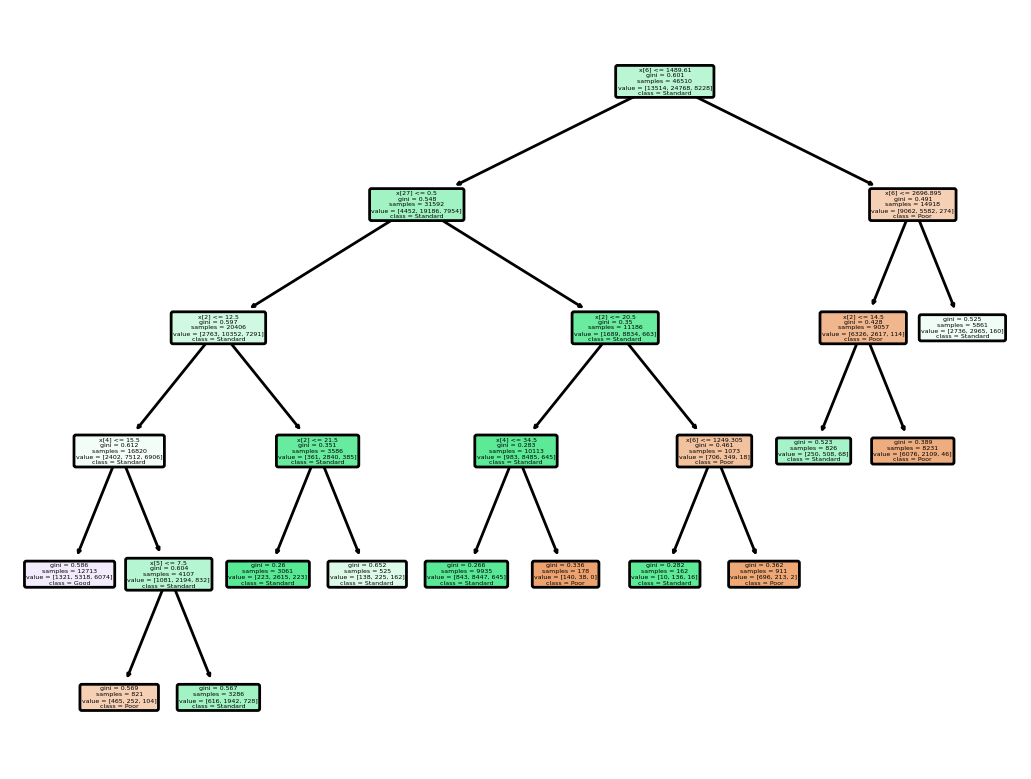

In [82]:
plt.figure(dpi=200)
plot_tree(model, class_names=class_names,
          filled=True, rounded=True)
plt.show()

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Note:` Make sure to evaluate the model on unseen data (e.g., use validation set, cross validation, etc.)

`Q` Which metric is more reliable?

`Q` Does these values necessarily mean a good model?

In [83]:
print(classification_report(y_train, model.predict(x_train), target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Poor     0.7274    0.5459    0.6237     13514
    Standard     0.7118    0.6798    0.6954     24768
        Good     0.4778    0.7382    0.5801      8228

    accuracy                         0.6512     46510
   macro avg     0.6390    0.6546    0.6331     46510
weighted avg     0.6749    0.6512    0.6542     46510



## `iii` Regularization Mode: On

Let's try contraining the model a bit. Change the default $max_depth$ parameter.

`Q` Does this simple regularization make the model generalize better?

In [84]:
model_regularized= DecisionTreeClassifier(random_state=1234, max_depth= 10000 ,  ccp_alpha=0.0015).fit(x_train,y_train)

In [85]:
print(classification_report(y_train, model_regularized.predict(x_train), target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Poor     0.7274    0.5459    0.6237     13514
    Standard     0.7118    0.6798    0.6954     24768
        Good     0.4778    0.7382    0.5801      8228

    accuracy                         0.6512     46510
   macro avg     0.6390    0.6546    0.6331     46510
weighted avg     0.6749    0.6512    0.6542     46510



## `iv` Tuning Hyperparameters

Try different **reasonable & logical** regularization hyperparameter values and evaluate.

`Q` What is the best hyperparamters value combination?

`Note:` Make sure to tune only reasonable hyperparameter values as per the dataset characteristics.

`Note:` Make sure you elaborate your reasoning behind selecting each of the hyperparameters.

`Hint:` You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

`Hint:` It could be useful, and time saving, to start the tuning with a wider range using `RandomizedSearchCV` then switch to a finer range using `GridSearchCV` once you have found the near optimal area for the hyperparameter.

In [86]:
model_regularized_= DecisionTreeClassifier(random_state=1234, max_depth= 1000 , min_samples_leaf=150, ccp_alpha=0.0015).fit(x_train,y_train)

In [87]:
print(classification_report(y_train, model_regularized_.predict(x_train), target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Poor     0.7274    0.5459    0.6237     13514
    Standard     0.7118    0.6798    0.6954     24768
        Good     0.4778    0.7382    0.5801      8228

    accuracy                         0.6512     46510
   macro avg     0.6390    0.6546    0.6331     46510
weighted avg     0.6749    0.6512    0.6542     46510



In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


Model = DecisionTreeClassifier()

param_grid = { 'criterion':['gini','entropy'],'max_depth':[300,500,700,1000,2000], 'min_samples_leaf':[100, 200,300,400,500], 'min_weight_fraction_leaf':[0.0,1,3, 10]}

# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=Model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
750 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

Best Parameters: {'criterion': 'entropy', 'max_depth': 300, 'min_samples_leaf': 100, 'min_weight_fraction_leaf': 0.0}


In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=300, min_samples_leaf=100)

## `v` Feature Importance

Explore the feature importances calculated by the best model.

`Note:` Visualizing the importances would help extract insights.

`Q` Do the importance values make sense?

`Q` Can you intrepet the importance of the few top features?

In [93]:
grid_search.best_estimator_.feature_importances_

array([9.63704769e-03, 2.82979956e-02, 1.72382680e-01, 2.27332180e-03,
       7.34277282e-02, 3.70501655e-02, 4.69876173e-01, 2.06107144e-02,
       3.18058821e-02, 6.03452188e-03, 0.00000000e+00, 0.00000000e+00,
       7.75035286e-04, 0.00000000e+00, 7.14107481e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.33972486e-04, 4.06776805e-04, 8.38447845e-04, 1.32917231e-01,
       1.20181985e-02])

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [92]:
x_test.columns = x_test.columns.astype(str)
y_test.columns = y_train.columns.astype(str)
print(classification_report(y_test, grid_search.best_estimator_.predict(x_test), target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Poor     0.6837    0.6596    0.6714      5770
    Standard     0.7070    0.7189    0.7129     10548
        Good     0.5293    0.5330    0.5311      3512

    accuracy                         0.6687     19830
   macro avg     0.6400    0.6372    0.6385     19830
weighted avg     0.6687    0.6687    0.6686     19830



----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$